In [24]:
import pyautogui
import cv2
import numpy as np

# Create a transparent overlay window
cv2.namedWindow("Mouse Coordinates", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("Mouse Coordinates", cv2.WND_PROP_TOPMOST, 1)

while True:
    x, y = pyautogui.position()
    img = np.zeros((100, 300, 3), dtype=np.uint8)  # Black background
    cv2.putText(img, f"X: {x}, Y: {y}", (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Mouse Coordinates", img)
    
    if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to exit
        break

cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np
import os
import glob

# Initialize variables
drawing = False
ix, iy = -1, -1
fx, fy = -1, -1

# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, fx, fy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            fx, fy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        fx, fy = x, y
        print(f"Region Coordinates: (x={min(ix, fx)}, y={min(iy, fy)}, width={abs(fx-ix)}, height={abs(fy-iy)})")
        cv2.destroyAllWindows()

def get_latest_screenshot(folder_path):
    # List all PNG files in the folder
    screenshot_files = glob.glob(os.path.join(folder_path, "*.png"))
    
    # Sort by modification time (newest first)
    screenshot_files.sort(key=os.path.getmtime, reverse=True)
    
    if not screenshot_files:
        raise FileNotFoundError("No screenshots found in the folder!")
    
    return screenshot_files[0]  # Return the newest screenshot

# Example usage (using raw string for Windows paths)
screenshot_folder = r"Images/screenshots"  # <- FIXED (backslashes + raw string)
latest_screenshot_path = get_latest_screenshot(screenshot_folder)

# Load the image properly (using OpenCV)
screenshot = cv2.imread(latest_screenshot_path)

if screenshot is None:
    raise FileNotFoundError("Failed to load the screenshot!")

# Get image dimensions
height, width = screenshot.shape[:2]
print(f"Image dimensions: {width}x{height}")

# Create a window and bind the mouse callback
cv2.namedWindow("Select Region", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Select Region", width, height)
cv2.setMouseCallback("Select Region", draw_rectangle)

while True:
    img = screenshot.copy()
    if ix != -1 and iy != -1 and fx != -1 and fy != -1:
        cv2.rectangle(img, (ix, iy), (fx, fy), (0, 255, 0), 2)
    cv2.imshow("Select Region", img)
    
    if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to exit
        break

cv2.destroyAllWindows()

Image dimensions: 1920x1200
Region Coordinates: (x=1294, y=83, width=150, height=38)


In [4]:
from gameplay import Gameplay
from main import BTD6Bot
import time
import pyautogui

time.sleep(2)

bot = BTD6Bot()
bot.launch_game()
if bot.find_image_on_screen('images/collection_event/collection_event.png')[0] is not None or True :
    print("Collection Event found")
    # bot.wait_and_click('images/collection_event/collect.png', 'Click Collection Event')
    for i in range(2) :
        for tier in ["common", "tier3"] : 
            bot.wait_and_click(f'images/collection_event/{tier}.png', f'Collect {tier} tower')
            break
        time.sleep(0.5)
        pyautogui.click(1000, 1000)
    bot.wait_and_click('images/collection_event/continue.png', 'Back to collection event')
    if bot.find_image_on_screen('images/collection_event/collection_event.png')[0] is not None and bot.find_image_on_screen('images/collection_event/collect.png')[0] is None:
        pyautogui.click(84,67)
    bot.wait_and_click('images/collection_event/back.png', 'Back to home')






2025-06-17 18:05:22,632 - INFO - BTD6 is already running
2025-06-17 18:05:22,636 - INFO - Focused BTD6 window.
2025-06-17 18:05:23,161 - INFO - Looking for Collect common tower...


Max val is  0.12944704294204712
Collection Event found
Max val is  0.46805351972579956
Max val is  0.46805691719055176
Max val is  0.46805351972579956
Max val is  0.46805691719055176
Max val is  0.46805351972579956
Max val is  0.46805691719055176
Max val is  0.46805691719055176
Max val is  0.46805351972579956
Max val is  0.46805351972579956
Max val is  0.46805691719055176
Max val is  0.46805691719055176
Max val is  0.46806028485298157
Max val is  0.46805691719055176
Max val is  0.46805351972579956
Max val is  0.46805012226104736
Max val is  0.46805691719055176
Max val is  0.46805691719055176


2025-06-17 18:05:32,855 - INFO - Clicked Collect common tower.
2025-06-17 18:05:32,856 - INFO - Looking for Collect tier3 tower...


Max val is  0.2558014988899231
Max val is  0.25580376386642456
Max val is  0.25580263137817383
Max val is  0.25580376386642456
Max val is  0.2558014988899231
Max val is  0.25580376386642456
Max val is  0.2558014988899231
Max val is  0.2558014988899231
Max val is  0.25580376386642456
Max val is  0.4364020824432373


2025-06-17 18:05:38,606 - INFO - Clicked Collect tier3 tower.
2025-06-17 18:05:40,109 - INFO - Looking for Collect common tower...


Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.3928545415401459
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.411758154630661
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val is  0.4117644727230072
Max val i

2025-06-17 18:06:16,838 - INFO - Clicked Collect common tower.
2025-06-17 18:06:16,839 - INFO - Looking for Collect tier3 tower...
2025-06-17 18:06:18,318 - INFO - Clicked Collect tier3 tower.
2025-06-17 18:06:19,821 - INFO - Looking for Back to collection event...


Max val is  0.35871422290802
Max val is  0.35871422290802
Max val is  0.35871422290802
Max val is  0.35871422290802
Max val is  0.3315412998199463
Max val is  0.3315412998199463


KeyboardInterrupt: 

In [ ]:
from gameplay import Gameplay
from main import BTD6Bot
import time
import pyautogui

time.sleep(2)

bot = BTD6Bot()
bot.read_which_map_to_play()


c:\Users\juraj\anaconda3\envs\btd6_bot\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [1]:
bot

NameError: name 'bot' is not defined

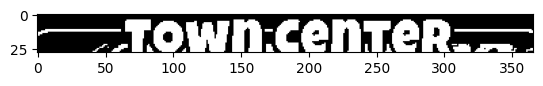

In [26]:
import pytesseract
screenshot = cv2.imread("images/misc/map_to_play.png")
# Convert to grayscale
screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
# Threshold the image
_, screenshot = cv2.threshold(screenshot, 127, 255, cv2.THRESH_BINARY)
# Save the image
cv2.imwrite("images/misc/map_to_play_threshold.png", screenshot)
text = pytesseract.image_to_string(screenshot)

text

import matplotlib.pyplot as plt
plt.imshow(screenshot, cmap='gray')
plt.show()

Found 3 matches:
Match 1: Confidence=0.991, Position=(900, 547), Size=(128, 101)
Match 2: Confidence=0.991, Position=(566, 547), Size=(128, 101)
Match 3: Confidence=0.943, Position=(1235, 547), Size=(128, 101)


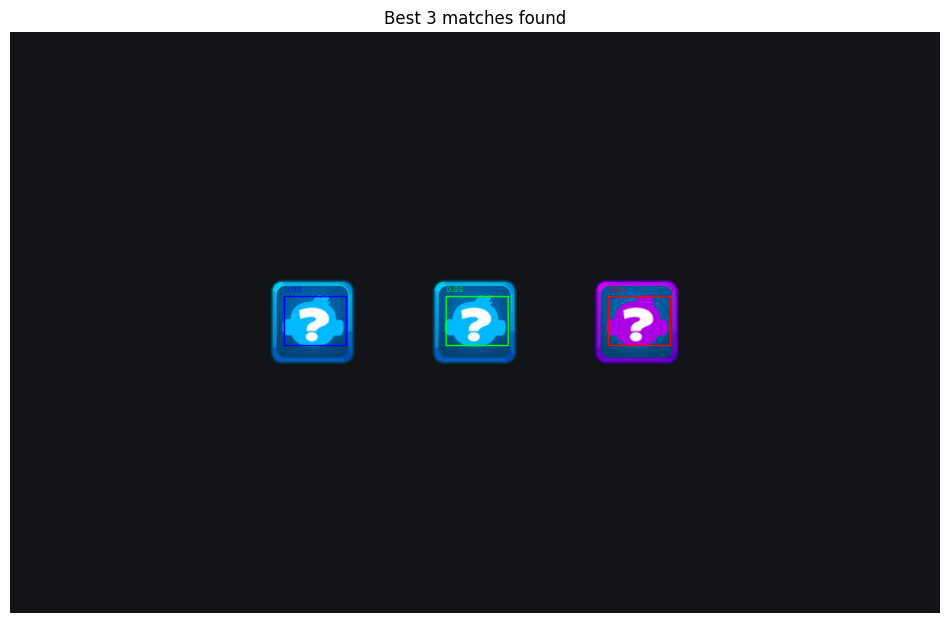

In [14]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_best_matches(img1, img2, num_matches=3, threshold=0.5):
    """
    Find the best matches of img1 in img2 using template matching.
    
    Args:
        img1: Template image to find
        img2: Image to search in
        num_matches: Number of best matches to return
        threshold: Minimum confidence threshold for matches
    
    Returns:
        List of tuples: (confidence, (x, y), (width, height))
    """
    # Convert images to grayscale if they aren't already
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Perform template matching
    result = cv2.matchTemplate(img2, img1, cv2.TM_CCOEFF_NORMED)
    
    # Get template dimensions
    h, w = img1.shape
    
    # Find all locations where the correlation exceeds threshold
    locations = np.where(result >= threshold)
    matches = []
    
    for pt in zip(*locations[::-1]):  # Switch columns and rows
        confidence = result[pt[1], pt[0]]
        matches.append((confidence, pt, (w, h)))
    
    # Sort matches by confidence (descending)
    matches.sort(key=lambda x: x[0], reverse=True)
    
    # Remove overlapping matches (non-maximum suppression)
    filtered_matches = []
    for match in matches:
        confidence, (x, y), (w, h) = match
        
        # Check if this match overlaps significantly with any existing match
        overlap = False
        for existing_match in filtered_matches:
            ex, ey, ew, eh = existing_match[1][0], existing_match[1][1], existing_match[2][0], existing_match[2][1]
            
            # Calculate overlap area
            x_overlap = max(0, min(x + w, ex + ew) - max(x, ex))
            y_overlap = max(0, min(y + h, ey + eh) - max(y, ey))
            overlap_area = x_overlap * y_overlap
            
            # Calculate areas
            area1 = w * h
            area2 = ew * eh
            min_area = min(area1, area2)
            
            # If overlap is more than 50% of the smaller area, consider it overlapping
            if overlap_area > 0.5 * min_area:
                overlap = True
                break
        
        if not overlap:
            filtered_matches.append(match)
            if len(filtered_matches) >= num_matches:
                break
    
    return filtered_matches[:num_matches]

# Example usage
img1 = cv2.imread("images/collection_event/tier2.png")
img2 = cv2.imread("images/screenshots/3.png")

# Find best 3 matches
matches = find_best_matches(img1, img2, num_matches=3, threshold=0.3)

print(f"Found {len(matches)} matches:")
for i, (confidence, (x, y), (w, h)) in enumerate(matches):
    print(f"Match {i+1}: Confidence={confidence:.3f}, Position=({x}, {y}), Size=({w}, {h})")

# Visualize the matches
if len(img2.shape) == 3:
    display_img = img2.copy()
else:
    display_img = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

for i, (confidence, (x, y), (w, h)) in enumerate(matches):
    # Draw rectangle around match
    color = [(0, 255, 0), (255, 0, 0), (0, 0, 255)][i % 3]  # Green, Blue, Red
    cv2.rectangle(display_img, (x, y), (x + w, y + h), color, 2)
    
    # Add confidence text
    cv2.putText(display_img, f"{confidence:.2f}", (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Display the result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
plt.title("Best 3 matches found")
plt.axis('off')
plt.show()

In [23]:
from main import BTD6Bot
import time


bot = BTD6Bot()
time.sleep(3)

bot.collection_event()

2025-06-19 10:51:38,307 - WARNING - Image not found with sufficient confidence. Max confidence: 0.265


True